In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def tridiag_matrix(x, N):
    U = lambda x: x ** 2 / 2
    h = x[1] - x[0]
    a = np.array([-1. / (2 * h ** 2)] * N)
    c = np.copy(a)
    a[0] = 0
    c[N - 1] = 0
    b = 1. / h ** 2 + U(x)
    return a, b, c


def sweep_tridiag_matrix(a, b, c, d, N):
    x = np.array([0.] * N)
    for j in range(1, N):
        b[j] -= a[j] / b[j - 1] * c[j - 1]
        d[j] -= a[j] / b[j - 1] * d[j - 1]
        a[j] = 0
    x[N - 1] = d[N - 1] / b[N - 1]
    for i in range(N - 2, -1, -1):
        x[i] = 1 / b[i] * (d[i] - c[i] * x[i + 1])
    return x

In [23]:
def inverse_iterations_method(initial, x, N, levels, iterations=10):
    eigenvalues = []
    eigenvectors = []
    a, b, c = tridiag_matrix(x, N)
    for level in range(0, levels):
        eigenvector = initial.copy()
        for k in range(0, iterations):
            previous_eigenvector = eigenvector
            eigenvector = sweep_tridiag_matrix(np.copy(a), np.copy(b), np.copy(c), np.copy(eigenvector), N)
            for psi in eigenvectors:
                eigenvector -= psi * (np.inner(eigenvector, psi)) / np.linalg.norm(psi)
        eigenvalue = np.linalg.norm(previous_eigenvector) / np.linalg.norm(eigenvector)
        eigenvalues.append(eigenvalue)
        eigenvector /= np.linalg.norm(eigenvector)
        eigenvectors.append(eigenvector)

    return eigenvalues, eigenvectors

E0: 0.4999874746519607


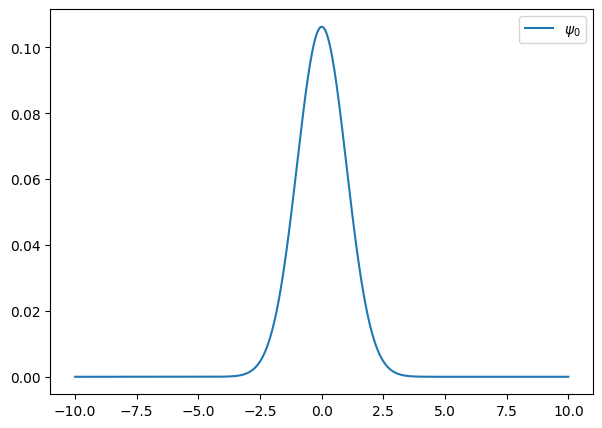

In [24]:
N = 1000
a = -10
b = 10
levels = 1
x = np.linspace(a, b, N)
initial = np.random.RandomState(2).random_sample(x.shape)
E, psi = inverse_iterations_method(initial, x, N, levels)

plt.figure(figsize=(7, 5), dpi=100)
for i in range(0, levels):
    print(f'E{i}: {E[i]}')
    plt.plot(x, psi[i], label=f'$\psi_{i}$')
plt.legend()
plt.show()